In [27]:
from numpy import ndarray, log
from pandas import read_csv, DataFrame, Series, concat, get_dummies
from scipy.stats import norm, expon, lognorm
from seaborn import heatmap, pairplot

import matplotlib.pyplot as plt
from matplotlib.axes import Axes
from matplotlib.figure import Figure
from matplotlib.pyplot import figure, savefig, show, subplots

from sklearn.preprocessing import OneHotEncoder

from dslab_functions import plot_multiline_chart, plot_multi_scatters_chart, plot_bar_chart, plot_multibar_chart, set_chart_labels, get_variable_types, define_grid, HEIGHT, encode_cyclic_variables, dummify, determine_outlier_thresholds_for_var, count_outliers

# read file
filename = "class_pos_covid.csv"
file_tag = "class_pos_covid"
df : DataFrame = read_csv('class_pos_covid.csv')

#df

## Data Dimensionality

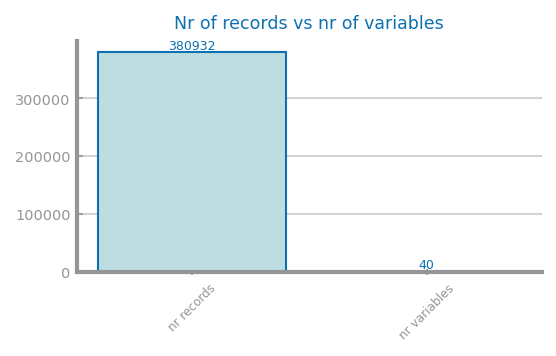

In [28]:
figure(figsize=(4, 2))

values: dict[str, int] = {"nr records": df.shape[0], "nr variables": df.shape[1]}

plot_bar_chart(list(values.keys()), list(values.values()), title="Nr of records vs nr of variables")
savefig(f"images/{file_tag}_records_variables.png", bbox_inches = "tight")
show()

In [44]:
# description
df.describe(include="all")

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
count,380932,380932,379975,371944.000000,373512.000000,374139,380127,376556.000000,371702,378555,...,372301.000000,360571.000000,355324.000000,376031,362611,378227,351134,346245,379456,380932
unique,54,2,5,NaN,NaN,4,2,NaN,4,2,...,NaN,NaN,NaN,2,2,2,2,4,2,2
top,Washington,Female,Very good,NaN,NaN,Within past year (anytime less than 12 months ...,Yes,NaN,None of them,No,...,NaN,NaN,NaN,Yes,No,Yes,No,"No, did not receive any tetanus shot in the pa...",No,No
freq,22388,201499,127352,NaN,NaN,301086,288481,NaN,198338,356585,...,NaN,NaN,NaN,196484,239602,198580,204991,116598,362957,270055
mean,NaN,NaN,NaN,4.384991,4.415732,NaN,NaN,7.022823,NaN,NaN,...,1.702571,83.217059,28.586092,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,8.742091,8.404087,NaN,NaN,1.491101,NaN,NaN,...,0.107171,21.485738,6.571412,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,1.000000,NaN,NaN,...,0.910000,22.680000,12.020000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,6.000000,NaN,NaN,...,1.630000,68.040000,24.140000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,7.000000,NaN,NaN,...,1.700000,81.190000,27.440000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,3.000000,5.000000,NaN,NaN,8.000000,NaN,NaN,...,1.780000,95.250000,31.840000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### SHAPE

In [30]:
# shape (Nr records x Nr variables)

print("Nr of records: ", len(df))
print("Dimensionality: ", df.shape)

Nr of records:  380932
Dimensionality:  (380932, 40)


### VARIABLE TYPES

{'numeric': ['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'HeightInMeters', 'WeightInKilograms', 'BMI'], 'binary': ['Sex', 'PhysicalActivities', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'ChestScan', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'HighRiskLastYear', 'CovidPos'], 'date': [], 'symbolic': ['State', 'GeneralHealth', 'LastCheckupTime', 'RemovedTeeth', 'HadDiabetes', 'SmokerStatus', 'ECigaretteUsage', 'RaceEthnicityCategory', 'AgeCategory', 'TetanusLast10Tdap']}


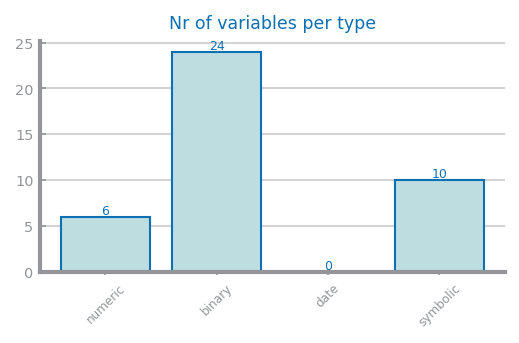

In [31]:
variable_types: dict[str, list] = get_variable_types(df)
print(variable_types)
counts: dict[str, int] = {}
for tp in variable_types.keys():
    counts[tp] = len(variable_types[tp])

figure(figsize=(4, 2))
plot_bar_chart(
    list(counts.keys()), list(counts.values()), title="Nr of variables per type"
)
savefig(f"images/{file_tag}_variable_types.png", bbox_inches = "tight")
show()

In [32]:
symbolic: list[str] = variable_types["symbolic"]
df[symbolic] = df[symbolic].apply(lambda x: x.astype("category"))
df.dtypes

State                        category
Sex                            object
GeneralHealth                category
PhysicalHealthDays            float64
MentalHealthDays              float64
LastCheckupTime              category
PhysicalActivities             object
SleepHours                    float64
RemovedTeeth                 category
HadHeartAttack                 object
HadAngina                      object
HadStroke                      object
HadAsthma                      object
HadSkinCancer                  object
HadCOPD                        object
HadDepressiveDisorder          object
HadKidneyDisease               object
HadArthritis                   object
HadDiabetes                  category
DeafOrHardOfHearing            object
BlindOrVisionDifficulty        object
DifficultyConcentrating        object
DifficultyWalking              object
DifficultyDressingBathing      object
DifficultyErrands              object
SmokerStatus                 category
ECigaretteUs

### MISSING VALUES

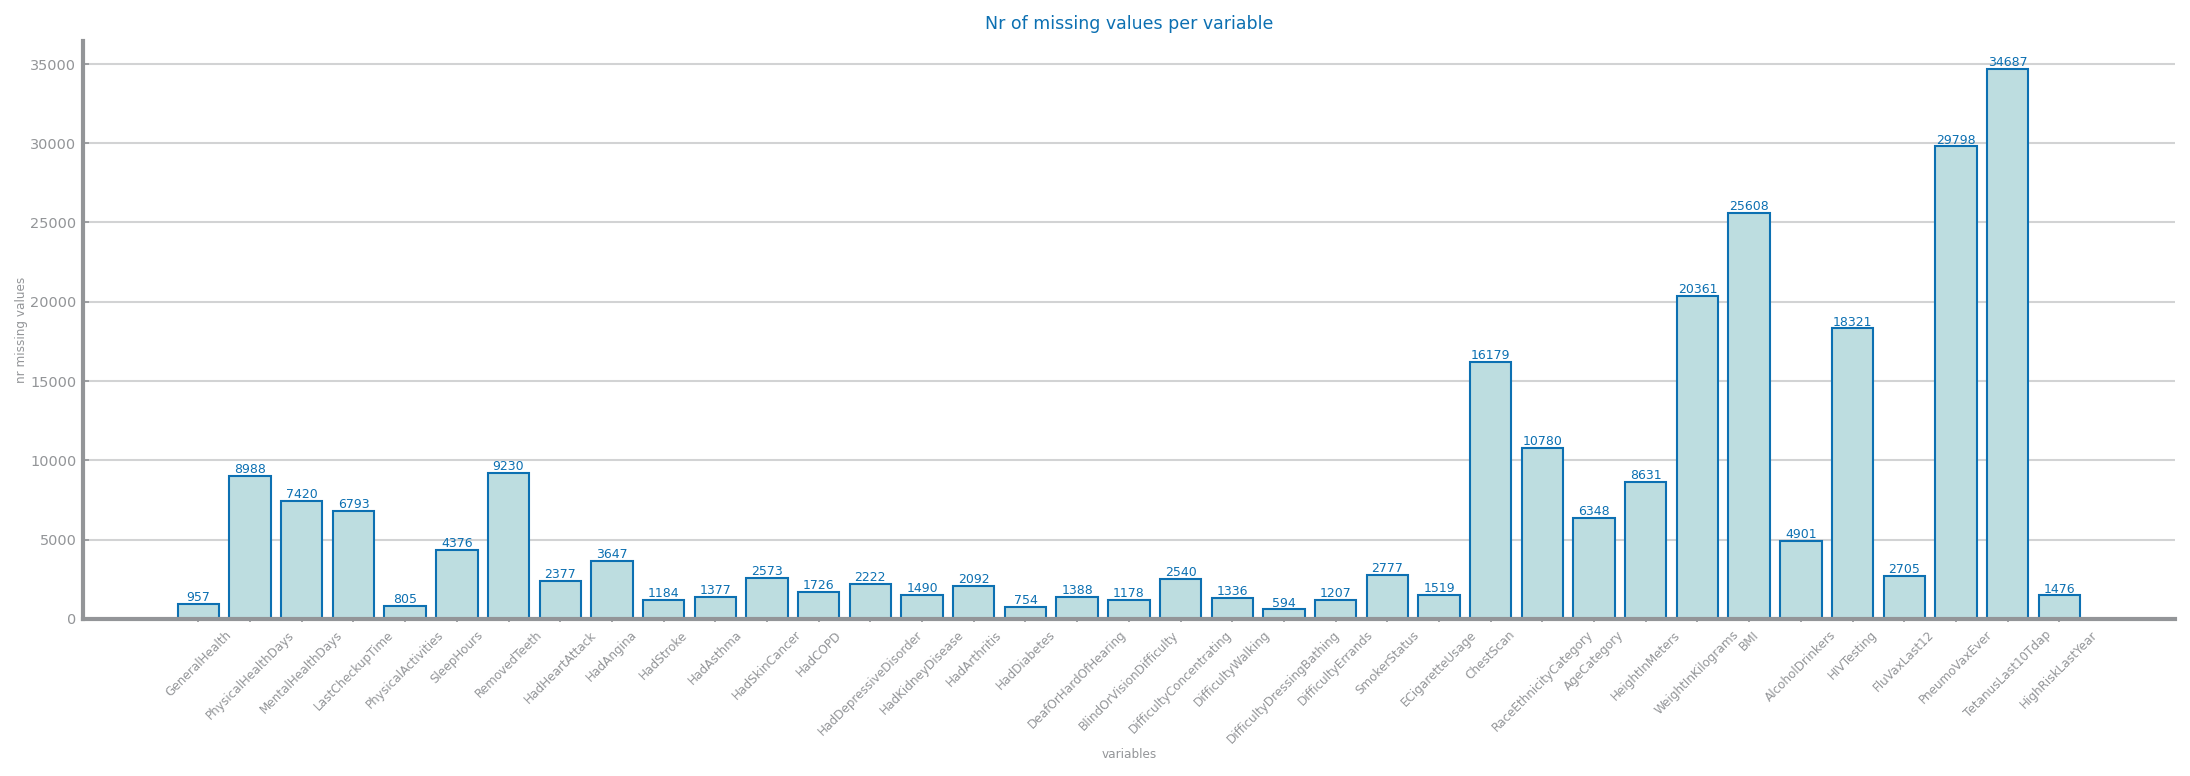

In [33]:
mv: dict[str, int] = {}
for var in df.columns:
    nr: int = df[var].isna().sum()
    if nr > 0:
        mv[var] = nr

figure(figsize=(18, 5))
plot_bar_chart(
    list(mv.keys()),
    list(mv.values()),
    title="Nr of missing values per variable",
    xlabel="variables",
    ylabel="nr missing values",
)
savefig(f"images/{file_tag}_mv.png", bbox_inches = "tight")
show()

## Data Granularity

#data granularity -> symbolic variables

In [34]:
#To see the different States in the category State
unique_values = df['State'].unique()
print(unique_values)
#nr_values = df.nunique(axis=0, dropna=True)
#print(nr_values)

['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', ..., 'Wisconsin', 'Wyoming', 'Guam', 'Puerto Rico', 'Virgin Islands']
Length: 54
Categories (54, object): ['Alabama', 'Alaska', 'Arizona', 'Arkansas', ..., 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']


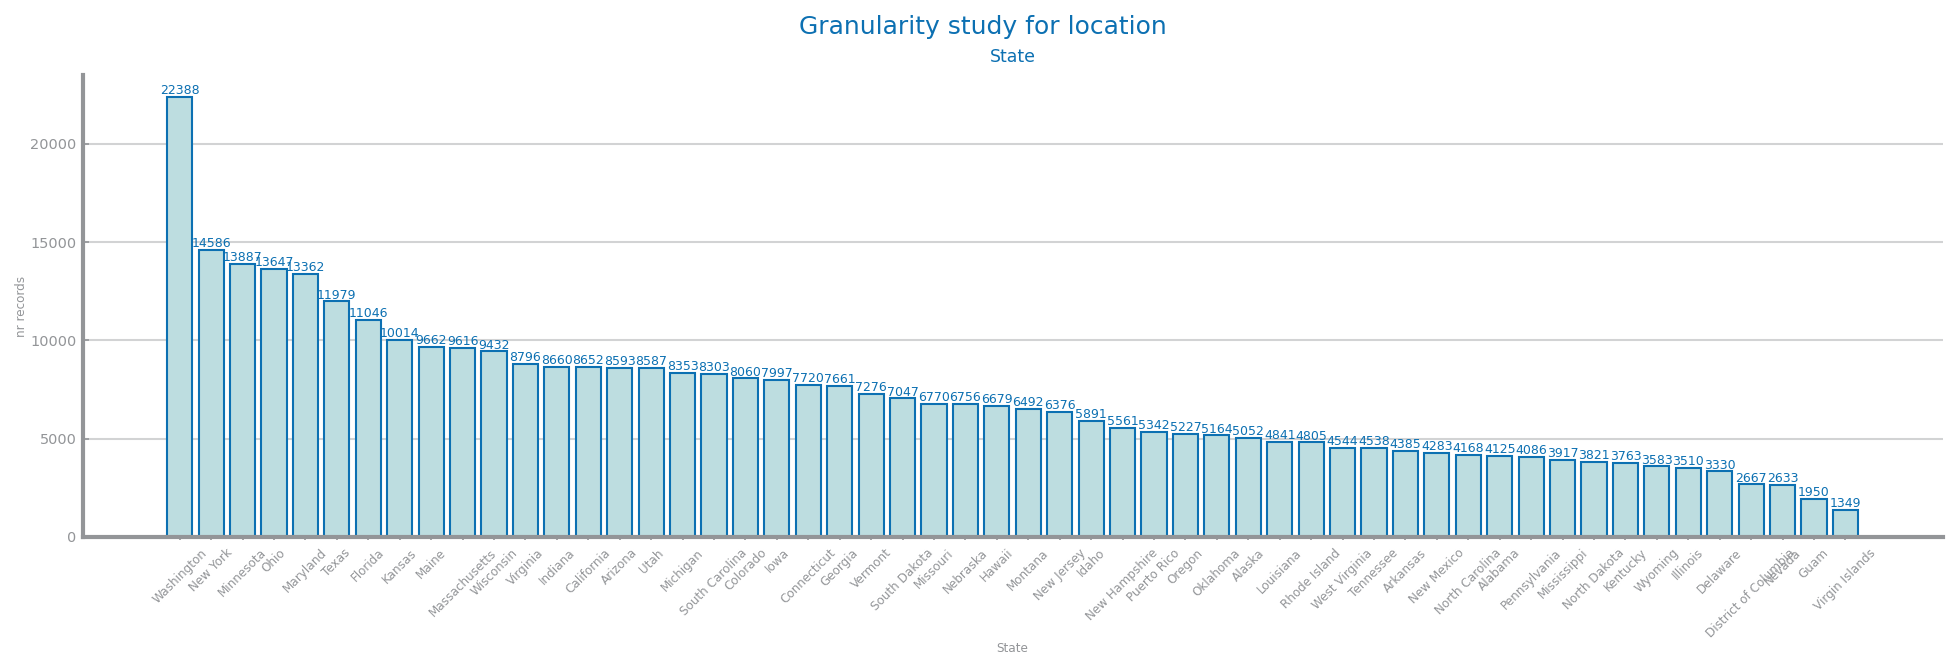

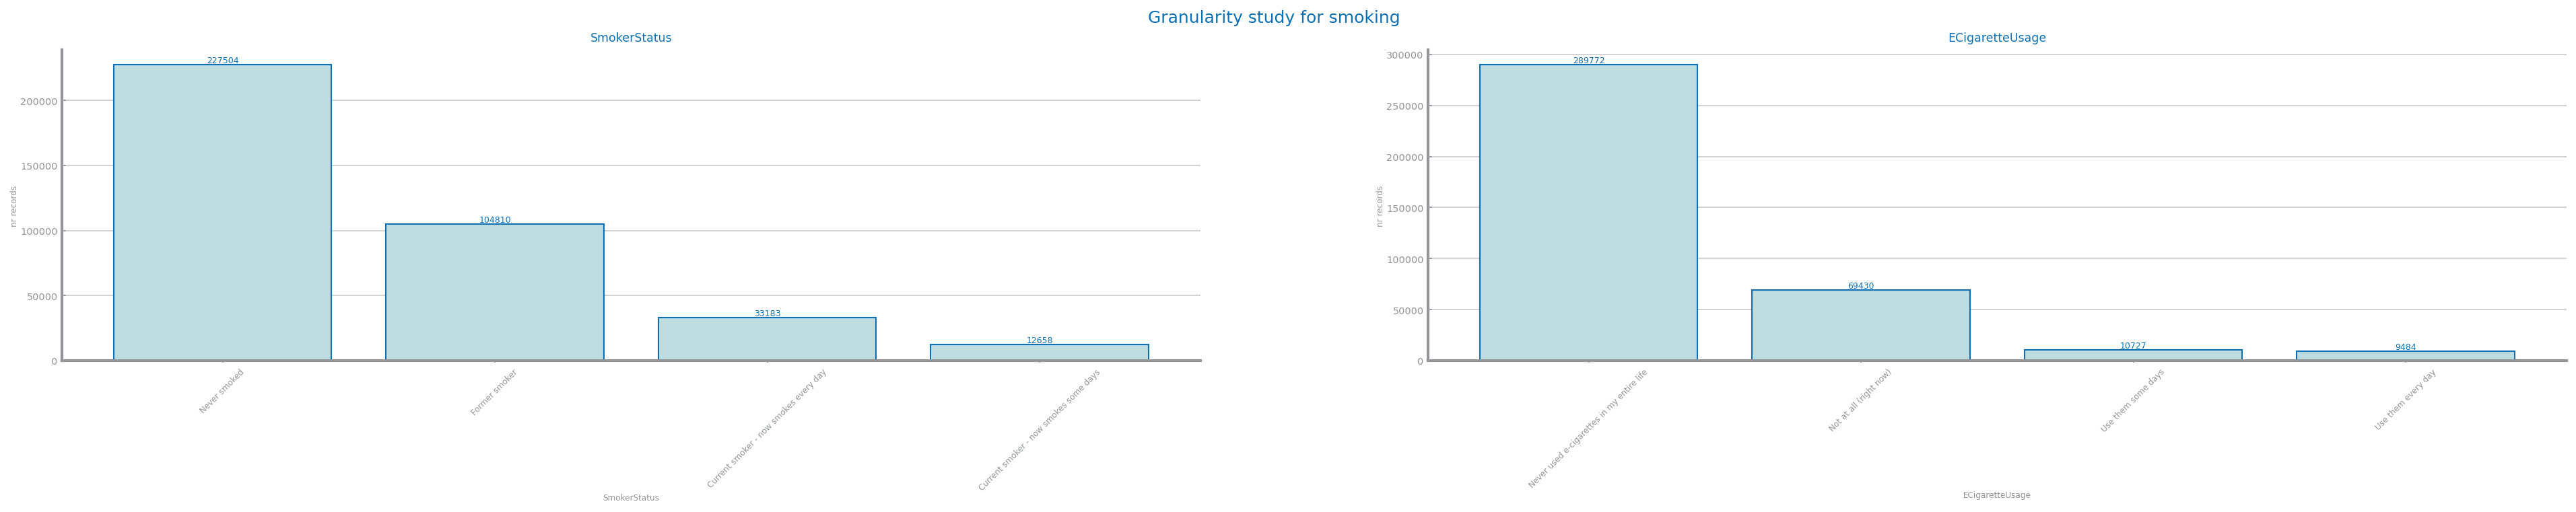

In [35]:
def analyse_property_granularity(
    data: DataFrame, property: str, vars: list[str]
) -> ndarray:
    cols: int = len(vars)
    fig: Figure
    axs: ndarray
    fig, axs = subplots(1, cols, figsize=(cols * HEIGHT * 4, HEIGHT), squeeze=False)
    fig.suptitle(f"Granularity study for {property}")
    for i in range(cols):
        counts: Series[int] = data[vars[i]].value_counts()
        plot_bar_chart(
            counts.index.to_list(),
            counts.to_list(),
            ax=axs[0, i],
            title=vars[i],
            xlabel=vars[i],
            ylabel="nr records",
            percentage=False
        )
    return axs

prop1 = "location"
prop2 = "smoking"
analyse_property_granularity(df, prop1, ["State"])
savefig(f"images/{file_tag}_granularity_{prop1}.png", bbox_inches = "tight")
analyse_property_granularity(df, prop2, ["SmokerStatus", "ECigaretteUsage"])
savefig(f"images/{file_tag}_granularity_{prop2}.png", bbox_inches = "tight")
show()

## Data Distribution

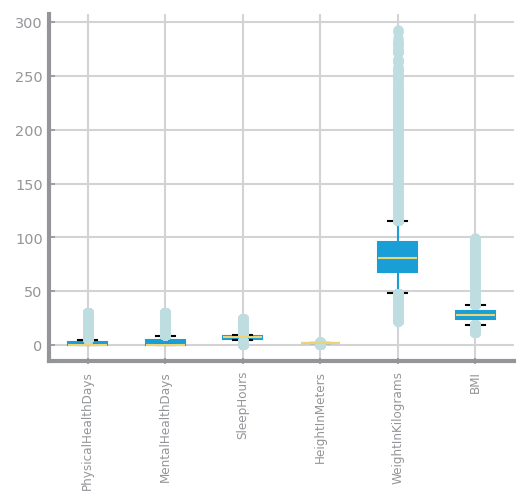

In [36]:
# global boxplot
variables_types: dict[str, list] = get_variable_types(df)
numeric: list[str] = variables_types["numeric"]
if [] != numeric:
    df[numeric].boxplot(rot=90)
    savefig(f"images/{file_tag}_global_boxplot.png", bbox_inches = "tight")
    show()
else:
    print("There are no numeric variables.")

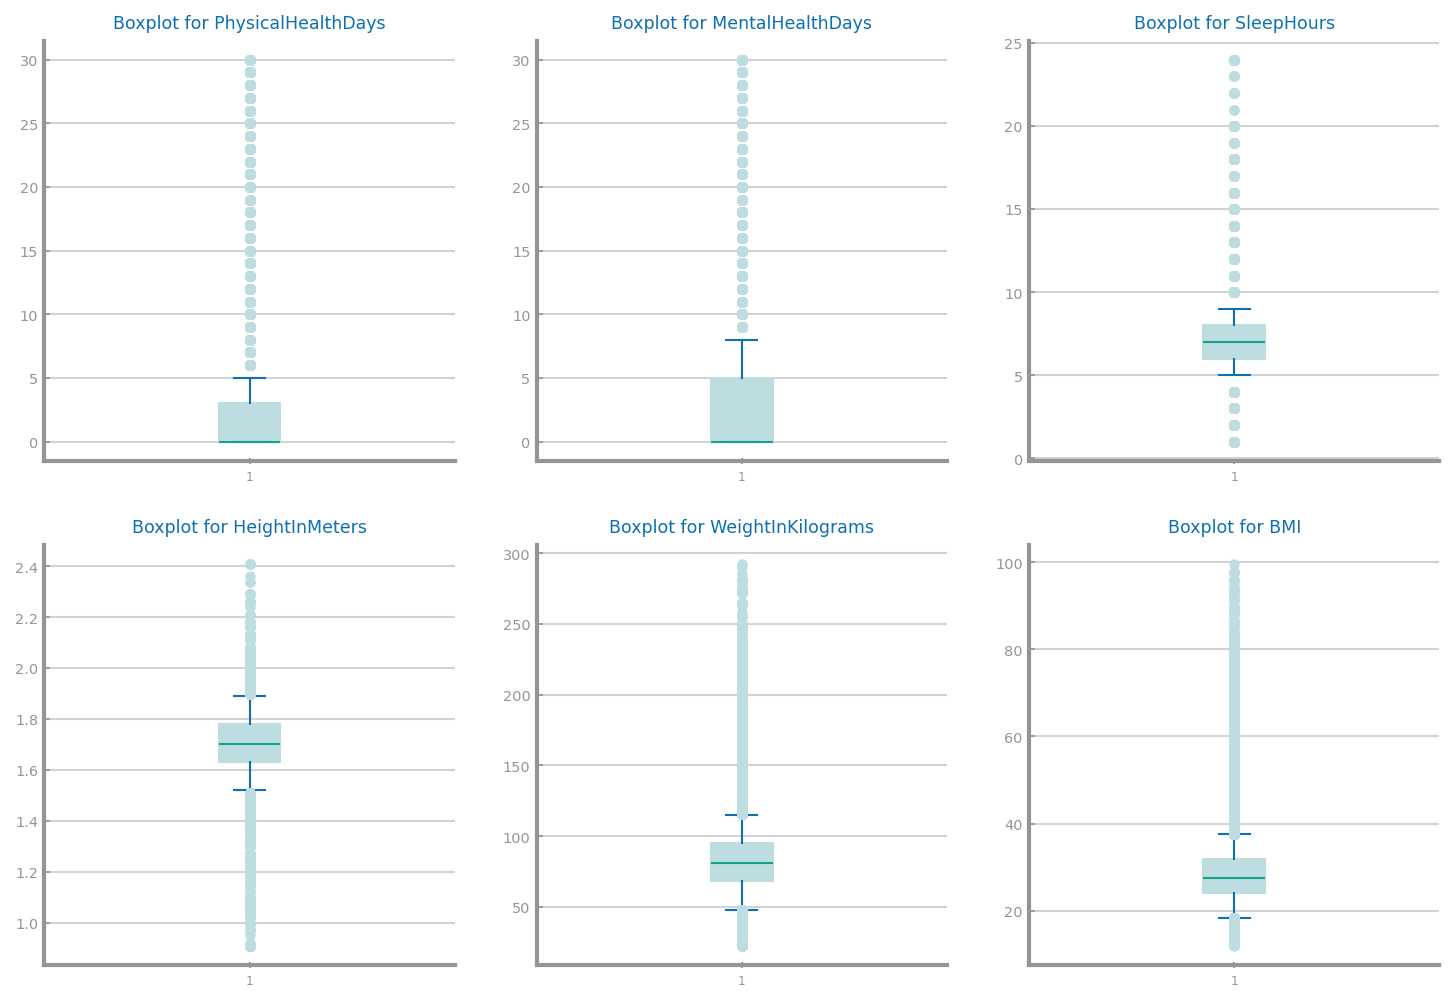

In [37]:
# boxplots for individual numeric vars
if [] != numeric:
    rows: int
    cols: int
    rows, cols = define_grid(len(numeric))
    fig: Figure
    axs: ndarray
    fig, axs = subplots(
        rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False
    )
    i, j = 0, 0
    for n in range(len(numeric)):
        axs[i, j].set_title("Boxplot for %s" % numeric[n])
        axs[i, j].boxplot(df[numeric[n]].dropna().values)
        i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)
    savefig(f"images/{file_tag}_single_boxplots.png")
    show()
else:
    print("There are no numeric variables.")

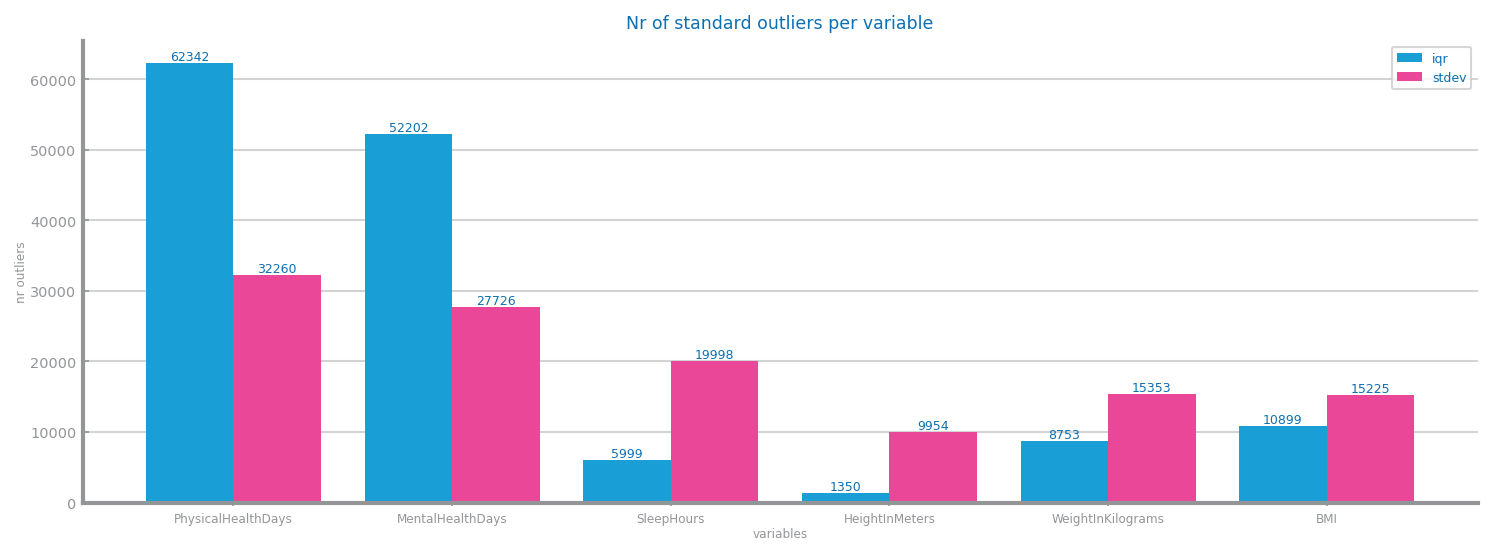

In [38]:
# outliers
if [] != numeric:
    outliers: dict[str, int] = count_outliers(df, numeric)
    figure(figsize=(12, HEIGHT))
    plot_multibar_chart(
        numeric,
        outliers,
        title="Nr of standard outliers per variable",
        xlabel="variables",
        ylabel="nr outliers",
        percentage=False,
    )
    savefig(f"images/{file_tag}_outliers_standard.png")
    show()
else:
    print("There are no numeric variables.")

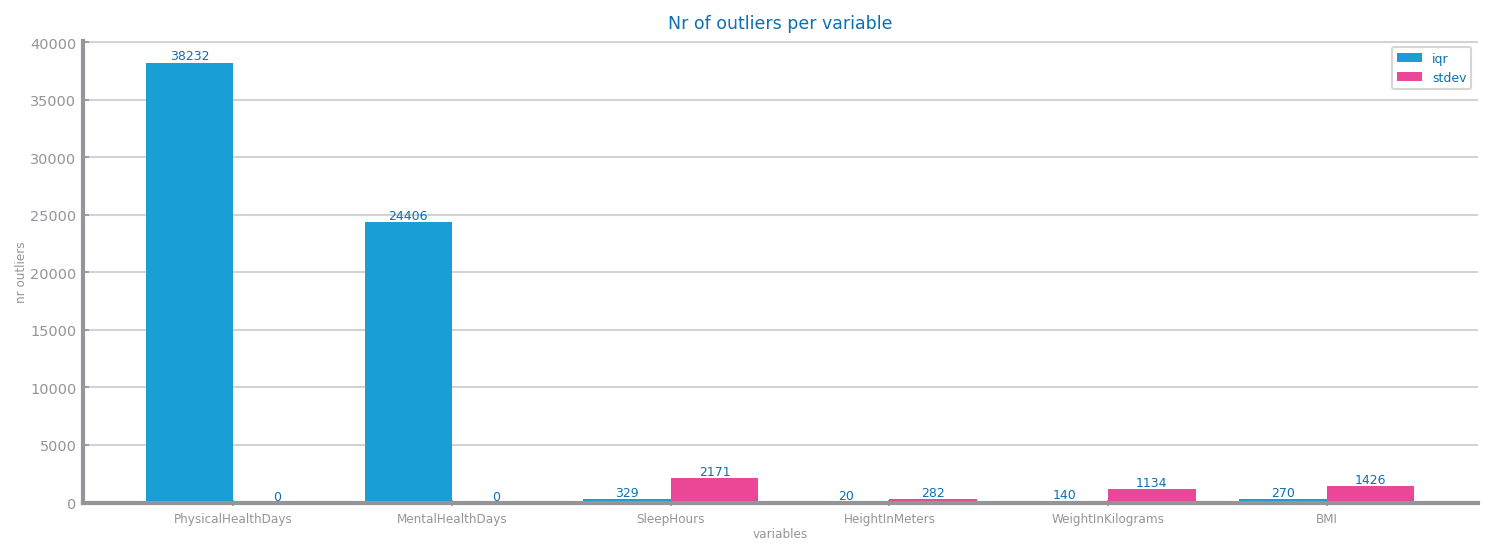

In [39]:
# outliers
if [] != numeric:
    outliers: dict[str, int] = count_outliers(df, numeric, nrstdev=4, iqrfactor=4.5)
    figure(figsize=(12, HEIGHT))
    plot_multibar_chart(
        numeric,
        outliers,
        title="Nr of outliers per variable",
        xlabel="variables",
        ylabel="nr outliers",
        percentage=False,
    )
    savefig(f"images/{file_tag}_outliers.png")
    show()
else:
    print("There are no numeric variables.")

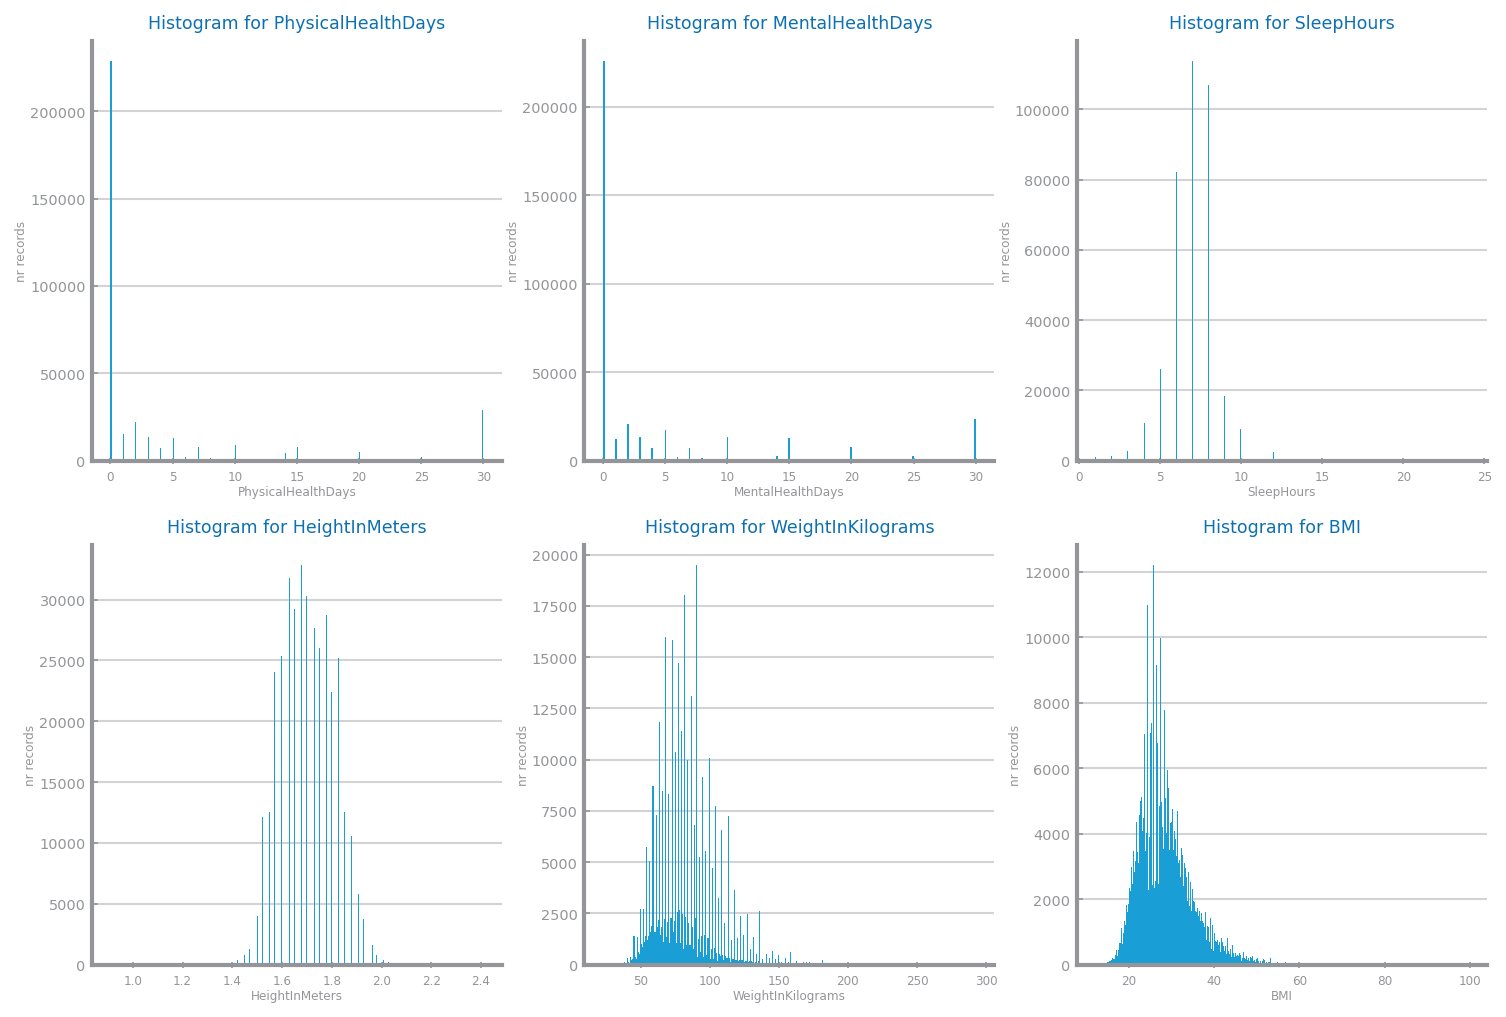

In [40]:
# histograms for numeric
if [] != numeric:
    fig, axs = subplots(
        rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False
    )
    i: int
    j: int
    i, j = 0, 0
    for n in range(len(numeric)):
        set_chart_labels(
            axs[i, j],
            title=f"Histogram for {numeric[n]}",
            xlabel=numeric[n],
            ylabel="nr records",
        )
        axs[i, j].hist(df[numeric[n]].dropna().values, "auto")
        i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)
    savefig(f"images/{file_tag}_single_histograms_numeric.png")
    show()
else:
    print("There are no numeric variables.")

In [25]:
# distributions for numeric
'''
def compute_known_distributions(x_values: list) -> dict:
    distributions = dict()
    # Gaussian
    mean, sigma = norm.fit(x_values)
    distributions["Normal(%.1f,%.2f)" % (mean, sigma)] = norm.pdf(x_values, mean, sigma)
    # Exponential
    loc, scale = expon.fit(x_values)
    distributions["Exp(%.2f)" % (1 / scale)] = expon.pdf(x_values, loc, scale)
    # LogNorm
    sigma, loc, scale = lognorm.fit(x_values)
    distributions["LogNor(%.1f,%.2f)" % (log(scale), sigma)] = lognorm.pdf(
        x_values, sigma, loc, scale
    )
    return distributions


def histogram_with_distributions(ax: Axes, series: Series, var: str):
    values: list = series.sort_values().to_list()
    ax.hist(values, 20, density=True)
    distributions: dict = compute_known_distributions(values)
    plot_multiline_chart(
        values,
        distributions,
        ax=ax,
        title="Best fit for %s" % var,
        xlabel=var,
        ylabel="",
    )


if [] != numeric:
    fig, axs = subplots(
        rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False
    )
    i, j = 0, 0
    for n in range(len(numeric)):
        histogram_with_distributions(axs[i, j], df[numeric[n]].dropna(), numeric[n])
        i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)
    savefig(f"images/{file_tag}_histogram_numeric_distribution.png")
    show()
else:
    print("There are no numeric variables.")
'''

'\ndef compute_known_distributions(x_values: list) -> dict:\n    distributions = dict()\n    # Gaussian\n    mean, sigma = norm.fit(x_values)\n    distributions["Normal(%.1f,%.2f)" % (mean, sigma)] = norm.pdf(x_values, mean, sigma)\n    # Exponential\n    loc, scale = expon.fit(x_values)\n    distributions["Exp(%.2f)" % (1 / scale)] = expon.pdf(x_values, loc, scale)\n    # LogNorm\n    sigma, loc, scale = lognorm.fit(x_values)\n    distributions["LogNor(%.1f,%.2f)" % (log(scale), sigma)] = lognorm.pdf(\n        x_values, sigma, loc, scale\n    )\n    return distributions\n\n\ndef histogram_with_distributions(ax: Axes, series: Series, var: str):\n    values: list = series.sort_values().to_list()\n    ax.hist(values, 20, density=True)\n    distributions: dict = compute_known_distributions(values)\n    plot_multiline_chart(\n        values,\n        distributions,\n        ax=ax,\n        title="Best fit for %s" % var,\n        xlabel=var,\n        ylabel="",\n    )\n\n\nif [] != numeric:

In [41]:
#histograms for symbolic
variables_types: dict[str, list] = get_variable_types(df)
symbolic: list[str] = variables_types["symbolic"] + variables_types["binary"]
if [] != symbolic:
    rows, cols = define_grid(len(symbolic))
    fig, axs = subplots(
        rows, cols, figsize=(cols * HEIGHT * 2.5, rows * HEIGHT * 3.5), squeeze=False
    )
    i, j = 0, 0
    for n in range(len(symbolic)):
        counts: Series = df[symbolic[n]].value_counts()
        plot_bar_chart(
            counts.index.to_list(),
            counts.to_list(),
            ax=axs[i, j],
            title="Histogram for %s" % symbolic[n],
            xlabel=symbolic[n],
            ylabel="nr records",
            percentage=False,
        )
        i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)
    savefig(f"images/{file_tag}_histograms_symbolic.png", bbox_inches = "tight")
    show()
else:
    print("There are no symbolic variables.")

CovidPos
No     270055
Yes    110877
Name: count, dtype: int64


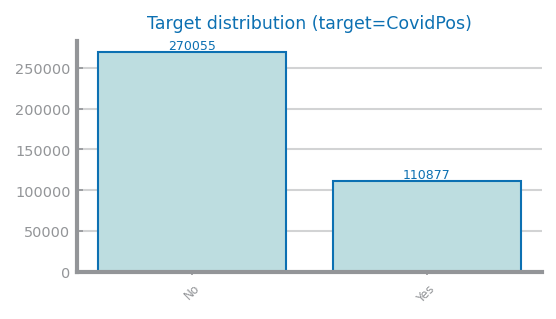

In [42]:
# class distribution
target = "CovidPos"

values: Series = df[target].value_counts()
print(values)

figure(figsize=(4, 2))
plot_bar_chart(
    values.index.to_list(),
    values.to_list(),
    title=f"Target distribution (target={target})",
)
savefig(f"images/{file_tag}_class_distribution.png", bbox_inches = "tight")
show()

## Data Sparsity 

In [18]:
# scatter-plots (all x all - including class)
'''
def dummify(df: DataFrame, vars_to_dummify: list[str]) -> DataFrame:
    other_vars: list[str] = [c for c in df.columns if not c in vars_to_dummify]

    enc = OneHotEncoder(
        handle_unknown="ignore", sparse_output=False, dtype="bool", drop="if_binary"
    )
    trans: ndarray = enc.fit_transform(df[vars_to_dummify])

    new_vars: ndarray = enc.get_feature_names_out(vars_to_dummify)
    dummy = DataFrame(trans, columns=new_vars, index=df.index)

    final_df: DataFrame = concat([df[other_vars], dummy], axis=1)
    return final_df

variables_types: dict[str, list] = get_variable_types(df)
symbolic: list[str] = variables_types["symbolic"] + variables_types["binary"]

df2: DataFrame = dummify(df, symbolic)

variables_types2: dict[str, list] = get_variable_types(df2)
numeric2: list[str] = variables_types2["numeric"]
symbolic2: list[str] = variables_types2["symbolic"] + variables_types2["binary"]
all_vars = numeric2 + symbolic2

pairplot(df2[all_vars])
savefig(f"images/{file_tag}_correlation_analysis.png")
show()
'''

'\ndef dummify(df: DataFrame, vars_to_dummify: list[str]) -> DataFrame:\n    other_vars: list[str] = [c for c in df.columns if not c in vars_to_dummify]\n\n    enc = OneHotEncoder(\n        handle_unknown="ignore", sparse_output=False, dtype="bool", drop="if_binary"\n    )\n    trans: ndarray = enc.fit_transform(df[vars_to_dummify])\n\n    new_vars: ndarray = enc.get_feature_names_out(vars_to_dummify)\n    dummy = DataFrame(trans, columns=new_vars, index=df.index)\n\n    final_df: DataFrame = concat([df[other_vars], dummy], axis=1)\n    return final_df\n\nvariables_types: dict[str, list] = get_variable_types(df)\nsymbolic: list[str] = variables_types["symbolic"] + variables_types["binary"]\n\ndf2: DataFrame = dummify(df, symbolic)\n\nvariables_types2: dict[str, list] = get_variable_types(df2)\nnumeric2: list[str] = variables_types2["numeric"]\nsymbolic2: list[str] = variables_types2["symbolic"] + variables_types2["binary"]\nall_vars = numeric2 + symbolic2\n\npairplot(df2[all_vars])\nsa

[[ True False False ... False False False]
 [ True False False ... False False False]
 [ True False False ... False False False]
 ...
 [False False False ... False False  True]
 [False False False ... False False  True]
 [False False False ... False False  True]]


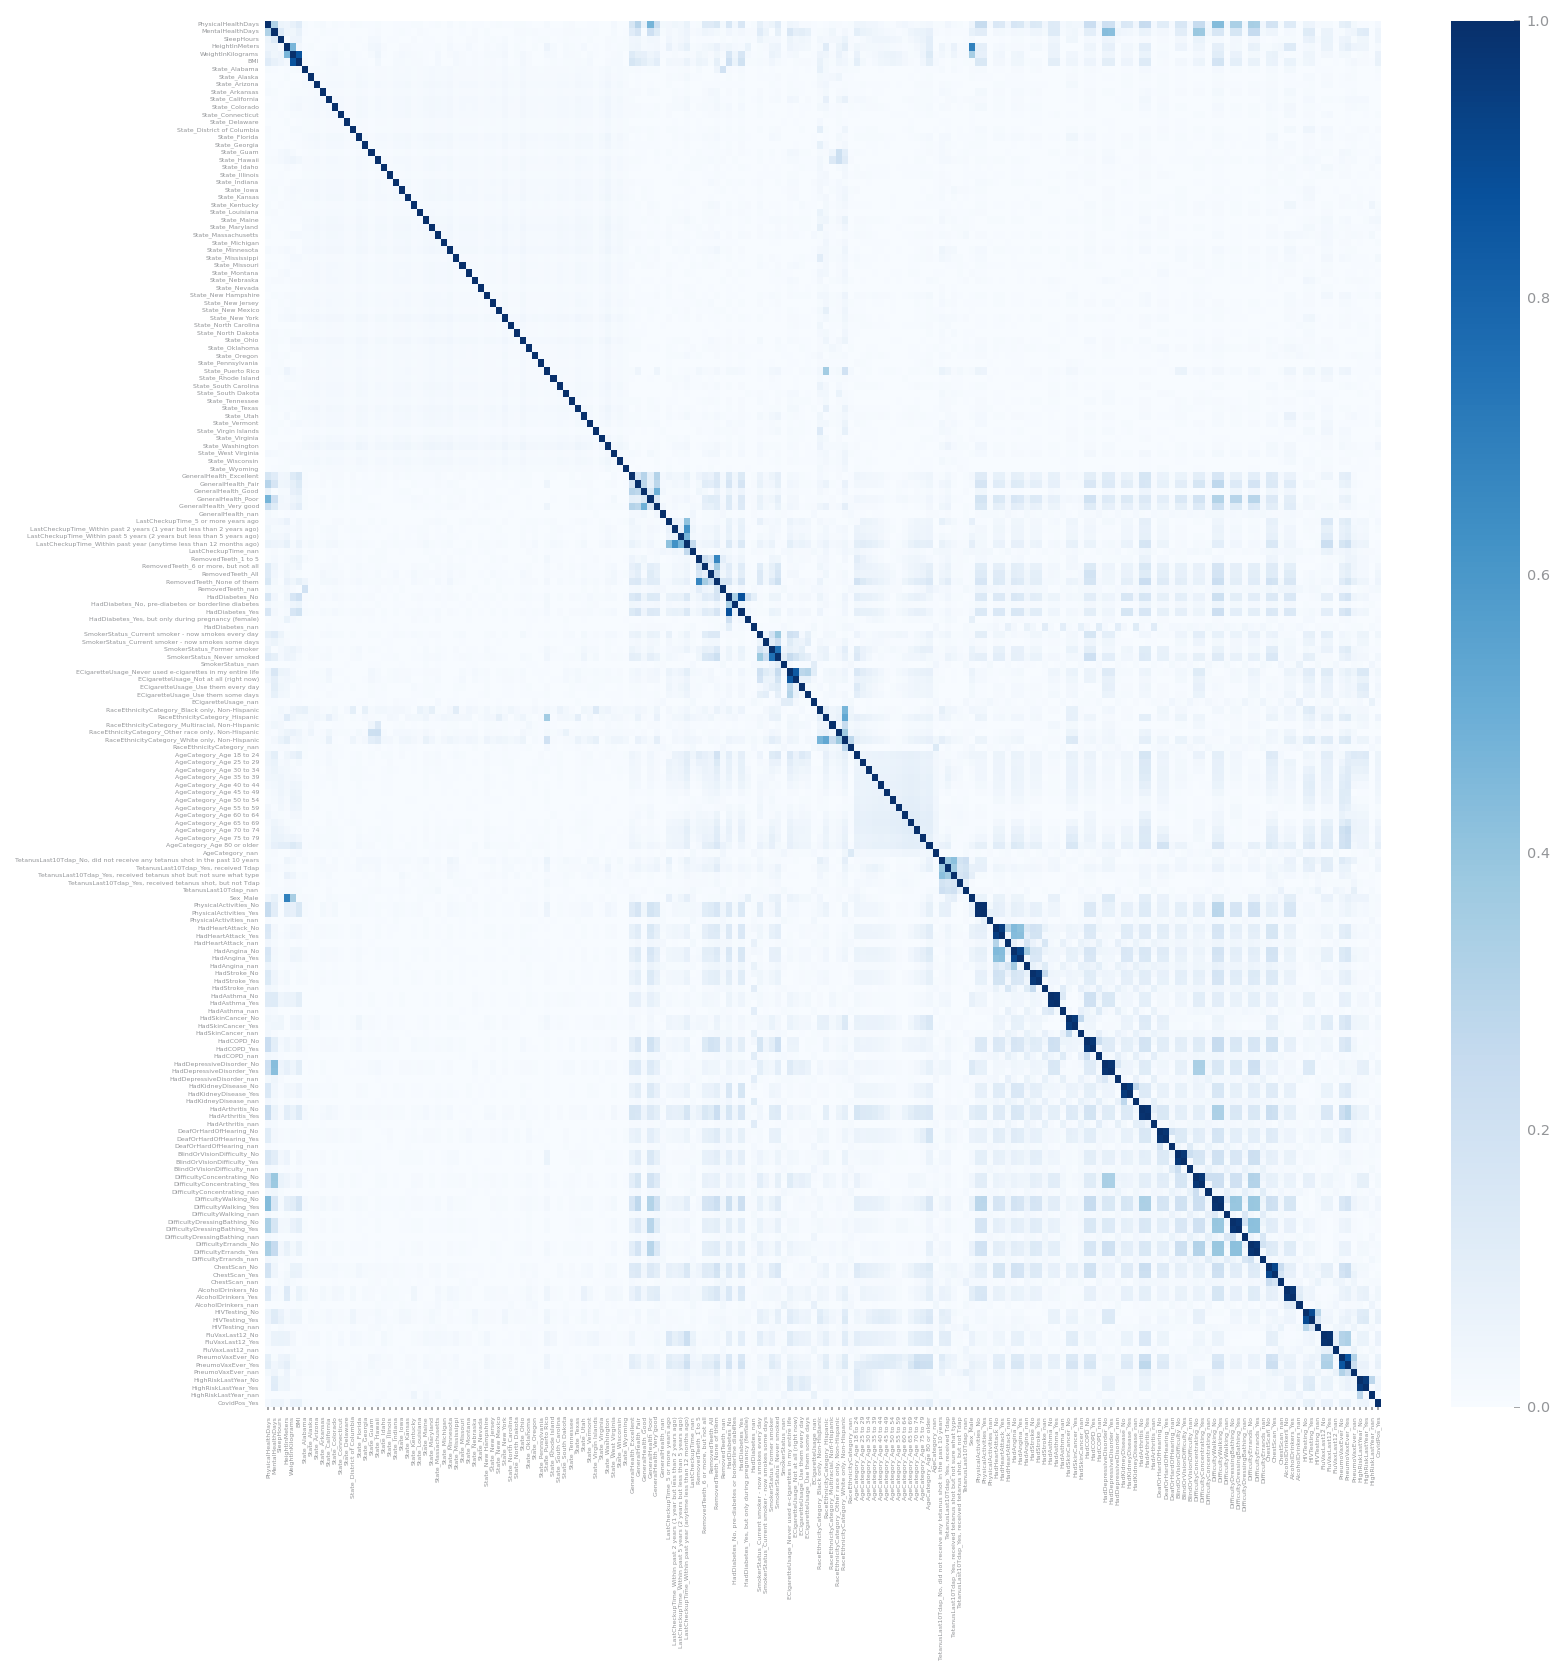

In [17]:
# correlation (all x all - including class)

variables_types: dict[str, list] = get_variable_types(df)
symbolic: list[str] = variables_types["symbolic"] + variables_types["binary"]

df2: DataFrame = dummify(df, symbolic)

variables_types2: dict[str, list] = get_variable_types(df2)
numeric2: list[str] = variables_types2["numeric"]
symbolic2: list[str] = variables_types2["symbolic"] + variables_types2["binary"]
all_vars = numeric2 + symbolic2

corr_mtx: DataFrame = df2[all_vars].corr().abs()

plt.figure(figsize=(12, 12))
heatmap(
    abs(corr_mtx),
    xticklabels=all_vars,
    yticklabels=all_vars,
    annot=False,
    cmap="Blues",
    vmin=0,
    vmax=1,
)

plt.xticks(fontsize=3)
plt.yticks(fontsize=3)

plt.savefig(f"images/{file_tag}_correlation_analysis.png", bbox_inches = "tight")
plt.show()